In [1]:
import matplotlib.pyplot as plt
import pandas as pd

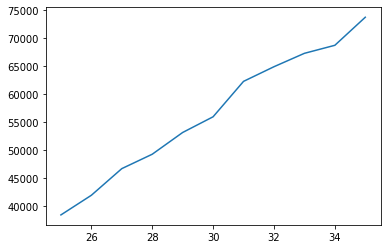

In [2]:

x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

plt.plot(x , y)


In [3]:
import seaborn as sns

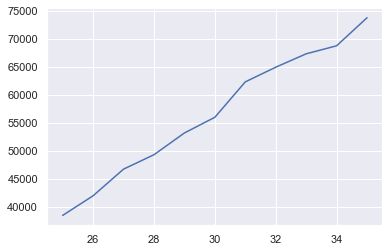

In [4]:
#seaborn makes the plots by matplotlib more aestehtic
sns.set()
plt.plot(x,y) #the figure is much better here without extra line of code

In [5]:
import matplotlib
matplotlib.__version__

'3.5.2'

### Seaborn with pandas

In [6]:
cars= sns.load_dataset('mpg')  #default df from seaborn library

In [7]:
type(cars)

pandas.core.frame.DataFrame

In [8]:
cars.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [9]:
cars.dropna(inplace=True)
cars.shape

(392, 9)

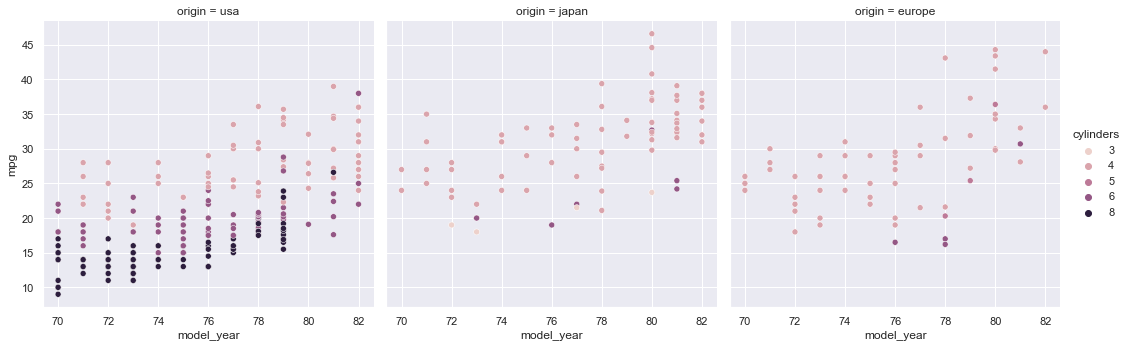

In [10]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders', data=cars) 

#col= column and the graph has been divided on the basis of that
#hue is giving shades of colour on the basis of the parameter given, like in matlplotlib color

## Kernel density Estimation (KDE) Plot

KDE is a non parametric(meaning that we aren't assuming any underlying distribution for our data therefore we don't have a mean ofr a sd to fit into) way to estimate the probability function of a random variable

***UNIVARIATE (1D) PLOT***

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

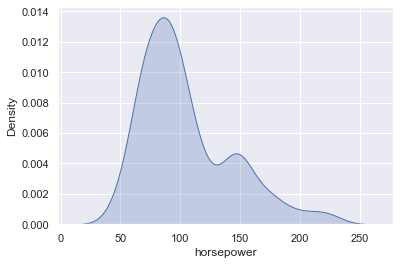

In [11]:
sns.kdeplot(cars.horsepower, shade=True)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

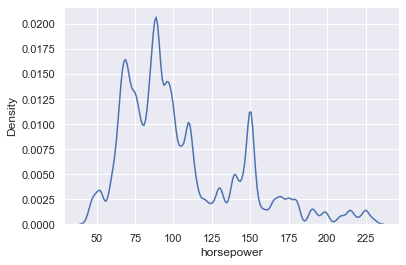

In [12]:
'''Bandwidth plays a HUGE role in how your plot looks like, decreasing the bw shows jaggered peaks, showing the increase
of the variance of your kde, increasing makes the curves smooth and even loses the modes of the dataset'''

sns.kdeplot(cars.horsepower, bw_adjust=0.2)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

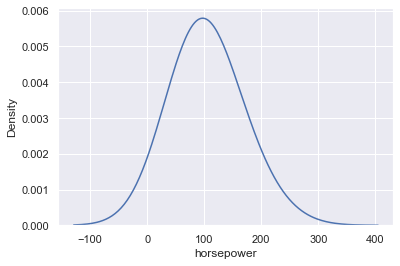

In [13]:
sns.kdeplot(cars.horsepower, bw_adjust=5)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

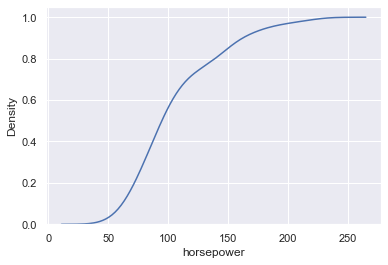

In [14]:
#if you want to change the probability function to cumulative

sns.kdeplot(cars.horsepower, cumulative=True)

***BIVARIATE PLOT***

It helps to create contours so that joint pdfs can be created

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

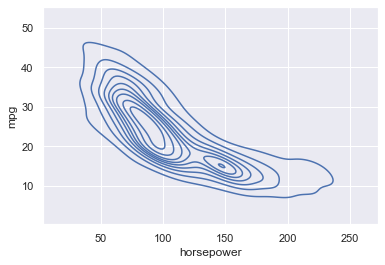

In [15]:
sns.kdeplot(cars.horsepower, cars.mpg)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

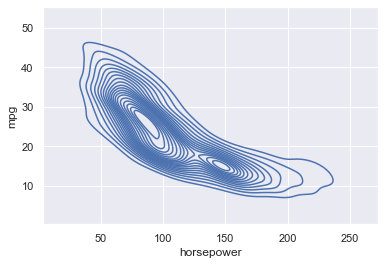

In [16]:
#we can increase or decrease the number of rings for a better understanding
sns.kdeplot(x=cars.horsepower, y=cars.mpg, n_levels=20) #x and y to remove the warning, can be ignored

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

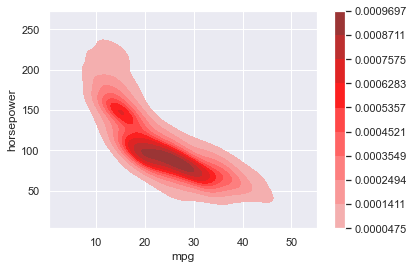

In [17]:
#instead of prominent lines, we can have a shaded plot

sns.kdeplot(y=cars.horsepower, x=cars.mpg, data=cars, cbar=True, shade=True, color='red')



#thresh=False is a parameter used to colour the background same as the plot, default is true
#cbar for representation

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

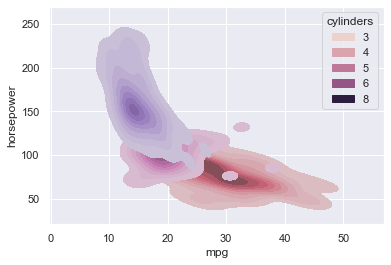

In [18]:

sns.kdeplot(y=cars.horsepower, x=cars.mpg, data=cars, shade=True, hue='cylinders')


## Histplots

In [19]:
pngs= sns.load_dataset('penguins')
pngs.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [20]:
pngs.shape

(344, 7)

In [21]:
pngs.dropna(inplace=True)
pngs.shape

(333, 7)

**UNIVARIATE HISTPLOTS**


***For Numeric variables***

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

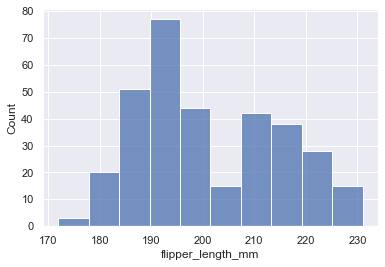

In [22]:
sns.histplot(pngs.flipper_length_mm)

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

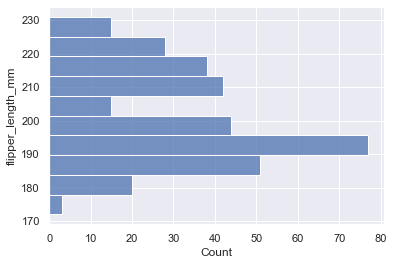

In [23]:
#we can easily do horizontal bars by passing the x & y parameter

sns.histplot(y= 'flipper_length_mm', data=pngs)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

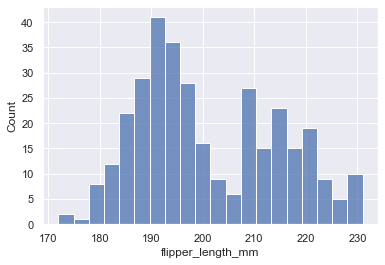

In [24]:
#like matplotlib we can add bins too
sns.histplot(x= 'flipper_length_mm', data=pngs, bins=20) #bins can also be in a list if wanted customised

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

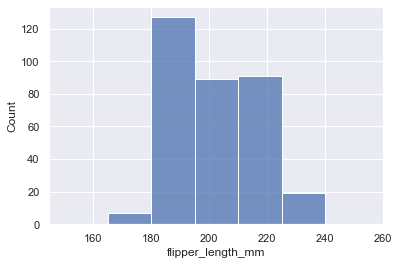

In [25]:
#there's binwidth and binrange too
sns.histplot(x= 'flipper_length_mm', data=pngs, binwidth=15, binrange=(150,250))

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

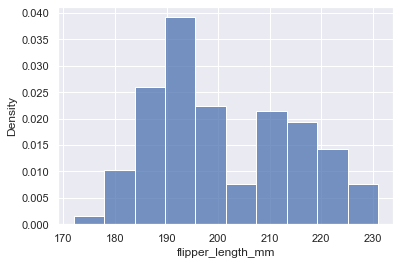

In [26]:
#we have stat function as a parameter too
sns.histplot(pngs.flipper_length_mm, stat="density") #count is set as default

#density here means that the area of the histogram sums to 1 therefore very helpful for the pdf

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Probability'>

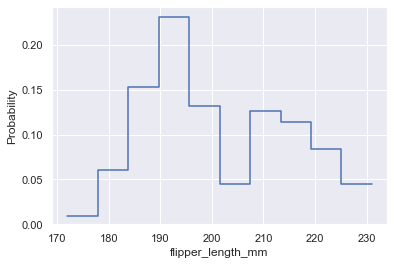

In [27]:
sns.histplot(pngs.flipper_length_mm, stat="probability", fill=False, element='step')

#this shows the probability of the penguin ending up in the sidtribution
#the probability here is the sum of heights of the bars which is equal to one
#we can make this cumulative by adding that parameter

***For categorical variables***

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

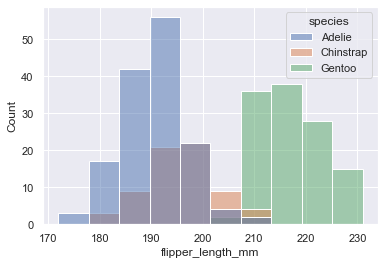

In [28]:
sns.histplot(x='flipper_length_mm', data=pngs, hue='species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

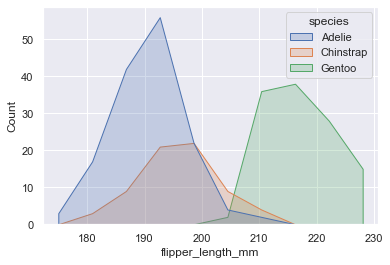

In [29]:
#instead of bars we can use step, outline or anything using the element fnc"
sns.histplot(x='flipper_length_mm', data=pngs, hue='species', element="poly")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

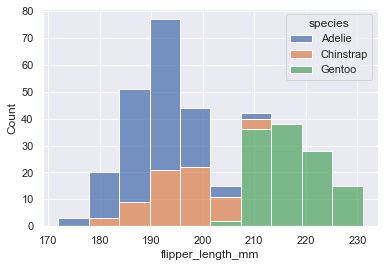

In [30]:
#we can stack the data instead of layering by using multiple fn
sns.histplot(x='flipper_length_mm', data=pngs, hue='species', multiple='stack') #multiple can be fill, uses the entire padding

**BIVARIATE HISTPLOTS**

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

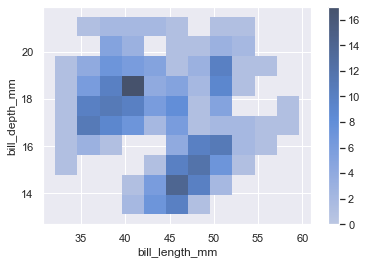

In [31]:
sns.histplot(x='bill_length_mm', y='bill_depth_mm',cbar=True, data=pngs)
#we can split it into categorical plotting by adding the hue option

## Emperical Cumulative Distribution Function(ECDF) Plot

The advantages of this kinda plot is thatthere is no binning and smoothing and the comparision is pretty easy.

The drawback is the central tendencies are not seen easily and is hard to detect in the bimodal distributions


In [32]:
tips=sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [33]:
tips.shape

(244, 7)

In [34]:
tips.dropna(inplace =True)
tips.shape

(244, 7)

<AxesSubplot:xlabel='tip', ylabel='Proportion'>

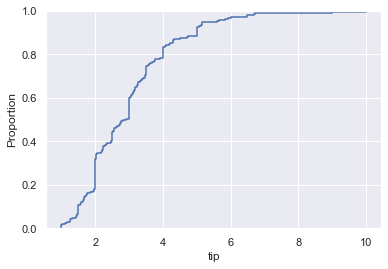

In [35]:
sns.ecdfplot(tips.tip) #the tip is arranged from min to maximum

In [36]:
tips.tip.min()

1.0

In [37]:
#we can see that there's almost a straight line for a 2$ tip signifying that it ahs been tipped most
tips.tip.value_counts().head()

#33 people tipped 2$

2.0    33
3.0    23
4.0    12
5.0    10
2.5    10
Name: tip, dtype: int64

'This shows that by the time 4$ is reached, 80% of the data is finished, i.e 805% people tipped upto 4$\n20% is greater than 4$'

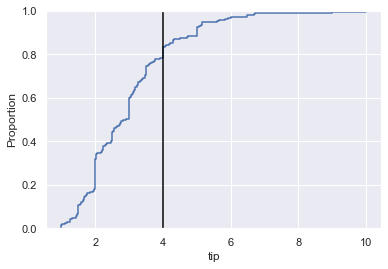

In [38]:
#we can add a particular value to compare the data above or below it
sns.ecdfplot(tips.tip)
plt.axvline(4, c='black')

'''This shows that by the time 4$ is reached, 80% of the data is finished, i.e 805% people tipped upto 4$
20% is greater than 4$'''


<AxesSubplot:xlabel='tip', ylabel='Proportion'>

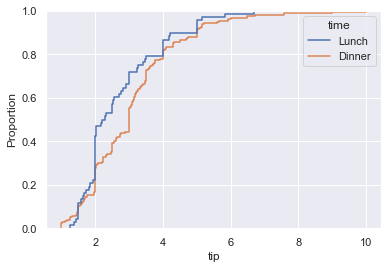

In [39]:
#like every other plot we can do any otehr categorical distribution
sns.ecdfplot(x='tip' , data=tips, hue='time')

#this clearly shows that people tipped more during dinner.


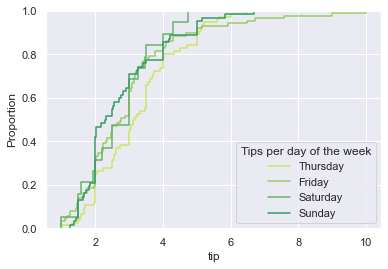

In [40]:
p=sns.ecdfplot(x='tip' , data=tips, hue='day', palette='summer')
p.legend(['Thursday', 'Friday', 'Saturday', 'Sunday'], title='Tips per day of the week') 
#we can add and update legends like this

#we can use pallete for different colors

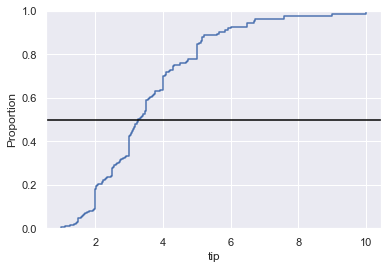

In [41]:
#we can add the option of weight to weigh the proprtion

sns.ecdfplot(x='tip' , data=tips, weights='tip')
plt.axhline(0.5, c='black')


#This shows that 50% of the money that was made was from tips less than $3.50

## Box and Whisker Plots

This is termed as a categorical plot by seaborn.

While plotting the whiskers if your IQR is outside of your plotted data set or is very far away, then simply end at the nearest 
value and a pont is added on the far away plot, representing it as an outlier

In [42]:

cars= sns.load_dataset('mpg')
cars.cylinders.value_counts()

#here 4 and 4 are kinda like an outlier

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [43]:
#filtering the data to cars having 4,6 or 8 cylinders
cars=cars[cars.cylinders.isin([4,6,8])]

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

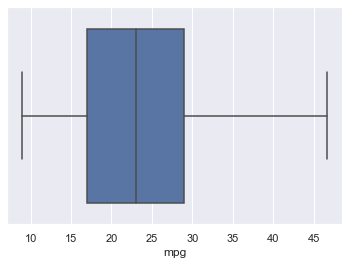

In [44]:
sns.boxplot(cars.mpg)

In [45]:
cars.mpg.describe()

#this clearly shows the plotting values and no outliers

count    391.000000
mean      23.515345
std        7.847549
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<AxesSubplot:xlabel='origin', ylabel='mpg'>

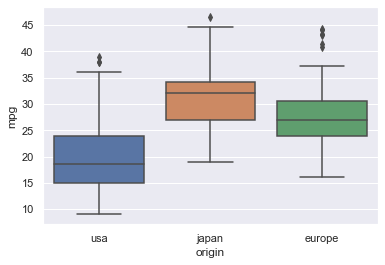

In [46]:
sns.boxplot(x='origin', y='mpg', data=cars)

#the diamond points on values signify the outliers

<AxesSubplot:xlabel='origin', ylabel='mpg'>

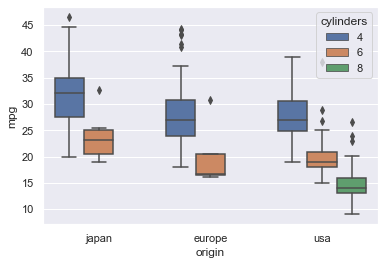

In [47]:
#as we did before, for another category we can always use hue
sns.boxplot(x='origin', y='mpg', data=cars, hue='cylinders', order=['japan', 'europe', 'usa'])


#we can change the order of our plots too and even hue order

In [48]:
#we can create new attributes and pass them as parameters to plot the graph
cars.model_year.describe()

count    391.000000
mean      75.992327
std        3.706189
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

<AxesSubplot:xlabel='origin', ylabel='mpg'>

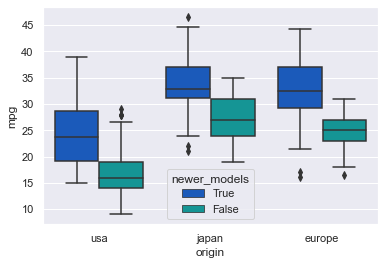

In [49]:
cars['newer_models']= cars.model_year >76
sns.boxplot(x='origin', y='mpg', data=cars, hue='newer_models', palette='winter', hue_order= [True, False])

<AxesSubplot:xlabel='origin', ylabel='mpg'>

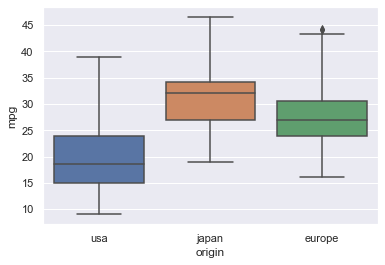

In [50]:
#for customising whiskers whis can be used but this will definitely change the outliers

sns.boxplot(x='origin', y='mpg', data=cars, whis=2)


<AxesSubplot:xlabel='origin', ylabel='mpg'>

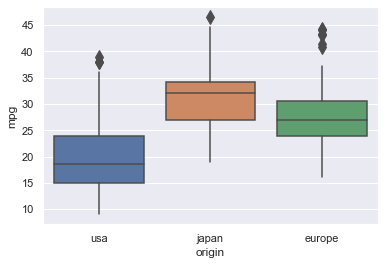

In [51]:
#the little diamonds on outliers are called as fliers and can be adjusted as well
sns.boxplot(x='origin', y='mpg', data=cars, fliersize=10, showcaps=False)

#showcaps adds/removes whiskers' ends

## Violin Plot

A categorical distribution plot.
The difference btw the boxplot and the violinplot is that the latter shows the kde distribution and there's no outlier 
clearly visible or plotted

In [52]:
cars= sns.load_dataset('mpg')
cars.cylinders.value_counts().dropna(inplace=True)

In [53]:
cars.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [54]:
cars=cars[cars.cylinders.isin([4,6,8])]

<AxesSubplot:xlabel='displacement'>

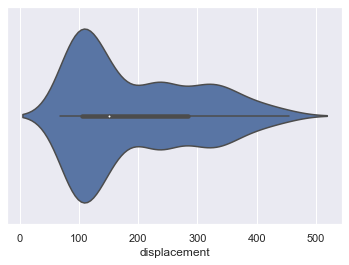

In [55]:
sns.violinplot(x='displacement', data=cars)

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

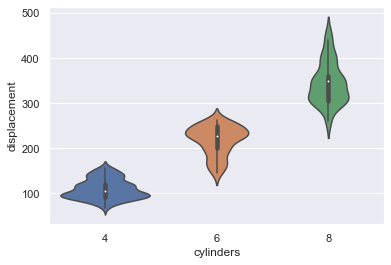

In [56]:
#we can easily make a split plot too using x,y or hue
sns.violinplot(y='displacement', x='cylinders', data=cars)

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

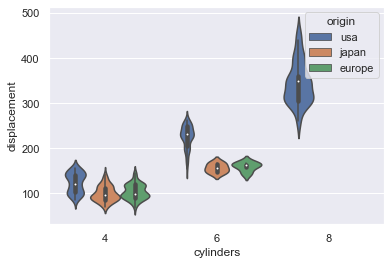

In [57]:
sns.violinplot(y='displacement', x='cylinders', data=cars, hue='origin')

'the split fn is is used to make the split graph of TWO values by breaking the symmetry for comparision purposes \nand laying out the data more efficiently'

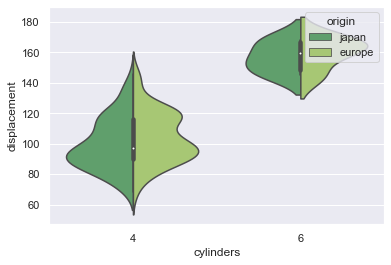

In [58]:
sns.violinplot(y='displacement', x='cylinders', data=cars[cars.origin.isin(['japan', 'europe'])], 
               palette='summer', hue='origin', split=True)

'''the split fn is is used to make the split graph of TWO values by breaking the symmetry for comparision purposes 
and laying out the data more efficiently'''

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

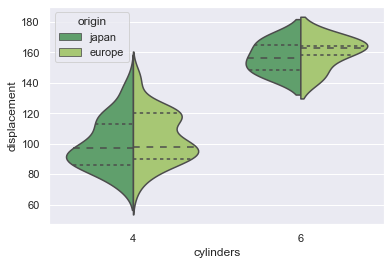

In [59]:
#all these violin plots have boxes inside them which can easily be split into quartiles for better understanding

sns.violinplot(y='displacement', x='cylinders', data=cars[cars.origin.isin(['japan', 'europe'])], 
               palette='summer', hue='origin', split=True, inner='quartiles')

#the area of the violin plots is equal to each other

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

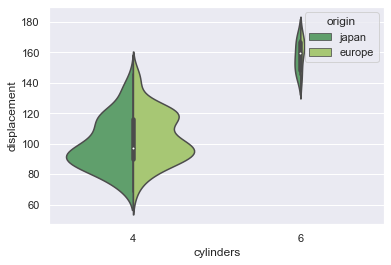

In [60]:
'''the plots are scaled by counts which is kinda misleading b/c first the data is divided into 4 & 6 cylinders then plotted,
so the number comparision is off the balance, for that we can scale it using  scale_hue'''


sns.violinplot(y='displacement', x='cylinders', data=cars[cars.origin.isin(['japan', 'europe'])], 
               palette='summer', hue='origin', split=True, scale='count', scale_hue=False)



#this clearly shows that the cars with 6 cylinders so less in number

In [61]:
#can confirm by
(
    cars[cars.origin.isin(['japan', 'europe'])]
      .groupby('cylinders')
      .origin
      .value_counts()
      
         )

#we can use styling options same as kde and boxplots
   

cylinders  origin
4          japan     69
           europe    63
6          japan      6
           europe     4
Name: origin, dtype: int64

## Swarmplot

The data is sorted and then plotted by value. The plotting never overlaps.

This is the reason that they are sometimes known as bee swarm plot

In [62]:
sns.set_style('whitegrid')

ars= sns.load_dataset('mpg')
cars.cylinders.value_counts().dropna(inplace=True)
cars.head()


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [63]:
cars=cars[cars.cylinders.isin([4,6,8])]

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

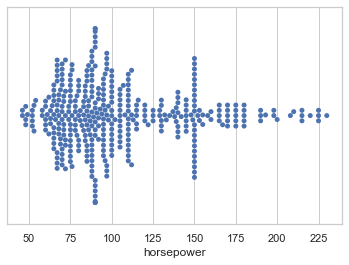

In [64]:
sns.swarmplot(cars.horsepower)

<AxesSubplot:xlabel='origin', ylabel='horsepower'>

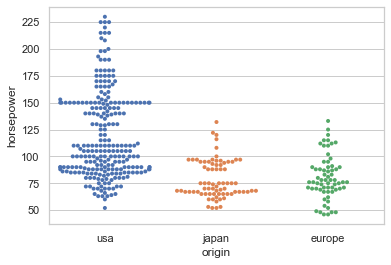

In [65]:
sns.swarmplot(x='origin', y='horsepower', data=cars, size=4)

<AxesSubplot:xlabel='origin', ylabel='horsepower'>

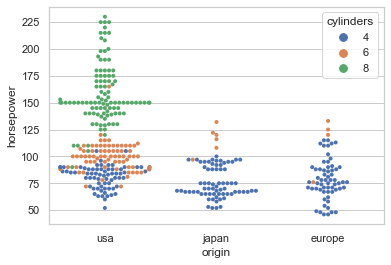

In [66]:
sns.swarmplot(x='origin', y='horsepower', data=cars, hue='cylinders', size=4)

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\AppData\Roaming\Py

<AxesSubplot:xlabel='origin', ylabel='horsepower'>

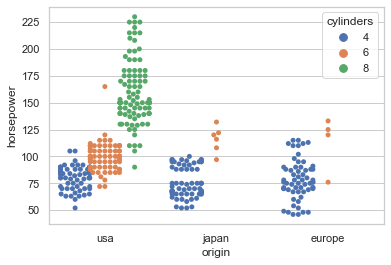

In [67]:
#we can split this graph on the basis of hue by using dodge
sns.swarmplot(x='origin', y='horsepower', data=cars, hue='cylinders', dodge=True)

#for violin and box, the dodge is set is default true

### Swarmplot Overlay

As the data is huge(hence the warnings) we can overlay it on other plots

***1. With Boxplots***

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

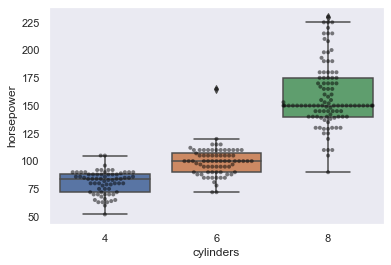

In [68]:
sns.set_style('dark')

sns.boxplot(x='cylinders', y='horsepower', data=cars[cars.origin.isin(['usa'])])
sns.swarmplot(x='cylinders', y='horsepower', data=cars[cars.origin.isin(['usa'])], color='black', alpha=0.5, size=4)

***2. With Violinplots***

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

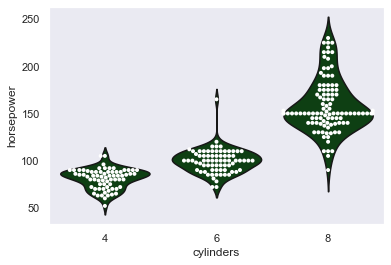

In [69]:
sns.violinplot(x='cylinders', y='horsepower', data=cars[cars.origin.isin(['usa'])], scale='width',
               inner=None, color='xkcd:forest green')
sns.swarmplot(x='cylinders', y='horsepower', data=cars[cars.origin.isin(['usa'])], color='white', size=4)

#for better visual we can turn off the boxplot inside of the violin


### Strip Plot

The difference btw the strip and swarm plot is that the former can have overlapping display, therefore the width cannot be
used to estimate the distribution function.
sometimes also known as the jitter plot as the jitter is a parameter which can be controlled.

In [70]:
sns.set_style('whitegrid')

ars= sns.load_dataset('mpg')
cars.cylinders.value_counts().dropna(inplace=True)
cars.head()


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [71]:
cars=cars[cars.cylinders.isin([4,6,8])]

<AxesSubplot:xlabel='weight'>

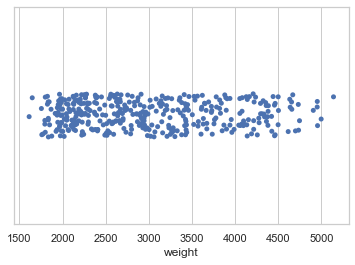

In [72]:
sns.stripplot(x='weight', data=cars)

<AxesSubplot:xlabel='weight', ylabel='origin'>

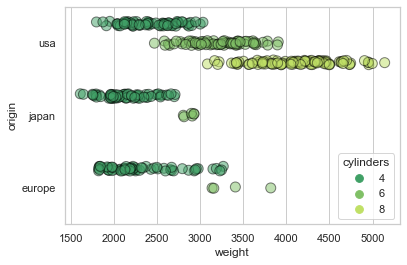

In [73]:
sns.stripplot(x='weight', y='origin', hue='cylinders', dodge= True, size=10, data=cars, 
              alpha=0.5, linewidth= 1, edgecolor='black', palette='summer')

<AxesSubplot:xlabel='weight', ylabel='origin'>

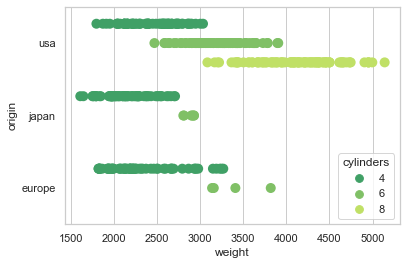

In [74]:
#if you want to turn the jitter off we can adjust that too. We can even adjust it by setting a number

sns.stripplot(x='weight', y='origin', hue='cylinders', dodge= True, size=10, data=cars, 
             jitter=False, palette='summer')

<AxesSubplot:xlabel='weight', ylabel='origin'>

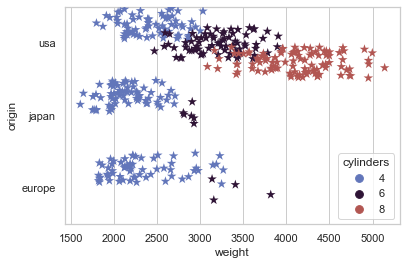

In [75]:
#we can change the marker style

sns.stripplot(x='weight', y='origin', hue='cylinders', dodge= True, size=10, data=cars, 
             jitter=0.65, palette='twilight', marker='*')

## Scatter Plot

The scatter plot is categorised as a relational plot as it establishes a relationship btw two different variables

In [76]:
diamonds= sns.load_dataset('diamonds')
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [77]:
diamonds.shape

(53940, 10)

In [78]:
diamonds.dropna(inplace=True)
diamonds.shape

(53940, 10)

In [79]:
#more cleaning
diamonds= diamonds[ diamonds.cut.isin(['Premium', 'Good']) &
                    diamonds.color.isin(['D','F','J'])]

diamonds=diamonds.sample(n=100, random_state=22) 
'''If you pass it a RandomState it will use this (already initialized/seeded) 
RandomState to generate pseudo random numbers. This also allows you to get reproducible results by setting a fixed seed 
when initializing the RandomState and then passing this RandomState around. Actually you should prefer this over setting the 
seed of numpys internal RandomState. 
'''

diamonds.shape




(100, 10)

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

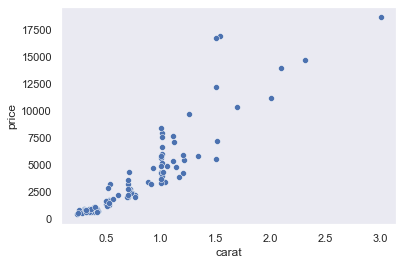

In [80]:
sns.set_style('dark')
sns.scatterplot(diamonds.carat, diamonds.price)

<AxesSubplot:xlabel='x', ylabel='y'>

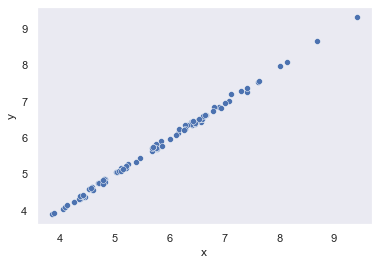

In [81]:
sns.scatterplot(x='x', y='y', data=diamonds)

#this clearly shows a strong relationship btw x and y

<AxesSubplot:xlabel='carat', ylabel='price'>

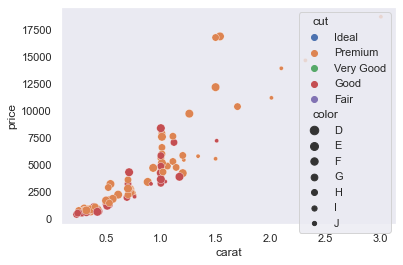

In [82]:
 
sns.scatterplot(x='carat', y='price', hue='cut',size='color', data=diamonds)

#we are literally comparing 4 semantic parameters
#we can do the same with size and style(marker style)

#we can use the parameters for the same attribute to really emphasixe the difference btw the two

## LinePlot

In [83]:
#Grab parking data from UCI resource with Bash commands and read in as pandas DataFrame.
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip

--2022-06-07 21:01:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240539 (235K) [application/x-httpd-php]
Saving to: 'dataset.zip.5'

     0K .......... .......... .......... .......... .......... 21% 80.9K 2s
    50K .......... .......... .......... .......... .......... 42%  167K 1s
   100K .......... .......... .......... .......... .......... 63% 1.41M 1s
   150K .......... .......... .......... .......... .......... 85% 1.77M 0s
   200K .......... .......... .......... ....                 100%  136K=1.2s

2022-06-07 21:01:09 (190 KB/s) - 'dataset.zip.5' saved [240539/240539]



In [84]:
import datetime
df= pd.read_csv('dataset.csv', parse_dates=[3]) #parse to extract dates, 3 is the column position
df.head()

SystemCodeNumber  Capacity  Occupancy         LastUpdated
0      BHMBCCMKT01       577         61 2016-10-04 07:59:42
1      BHMBCCMKT01       577         64 2016-10-04 08:25:42
2      BHMBCCMKT01       577         80 2016-10-04 08:59:42
3      BHMBCCMKT01       577        107 2016-10-04 09:32:46
4      BHMBCCMKT01       577        150 2016-10-04 09:59:48

Do a bit of data cleaning:

 - Rename some columns
 - Create three new date/time columns for later aggregations
 - Filter down to only two garage locations

In [85]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df

Location  Capacity  Occupancy           Timestamp
0      BHMBCCMKT01       577         61 2016-10-04 07:59:42
1      BHMBCCMKT01       577         64 2016-10-04 08:25:42
2      BHMBCCMKT01       577         80 2016-10-04 08:59:42
3      BHMBCCMKT01       577        107 2016-10-04 09:32:46
4      BHMBCCMKT01       577        150 2016-10-04 09:59:48
...            ...       ...        ...                 ...
35712     Shopping      1920       1517 2016-12-19 14:30:33
35713     Shopping      1920       1487 2016-12-19 15:03:34
35714     Shopping      1920       1432 2016-12-19 15:29:33
35715     Shopping      1920       1321 2016-12-19 16:03:35
35716     Shopping      1920       1180 2016-12-19 16:30:35

[35717 rows x 4 columns]

In [86]:
df['Day']= df.Timestamp.dt.date
df['Month']= df.Timestamp.dt.month
df['Hour']= df.Timestamp.dt.hour
df

Location  Capacity  Occupancy           Timestamp         Day  \
0      BHMBCCMKT01       577         61 2016-10-04 07:59:42  2016-10-04   
1      BHMBCCMKT01       577         64 2016-10-04 08:25:42  2016-10-04   
2      BHMBCCMKT01       577         80 2016-10-04 08:59:42  2016-10-04   
3      BHMBCCMKT01       577        107 2016-10-04 09:32:46  2016-10-04   
4      BHMBCCMKT01       577        150 2016-10-04 09:59:48  2016-10-04   
...            ...       ...        ...                 ...         ...   
35712     Shopping      1920       1517 2016-12-19 14:30:33  2016-12-19   
35713     Shopping      1920       1487 2016-12-19 15:03:34  2016-12-19   
35714     Shopping      1920       1432 2016-12-19 15:29:33  2016-12-19   
35715     Shopping      1920       1321 2016-12-19 16:03:35  2016-12-19   
35716     Shopping      1920       1180 2016-12-19 16:30:35  2016-12-19   

       Month  Hour  
0         10     7  
1         10     8  
2         10     8  
3         10     9  
4         10     9  
...      ...   ...  
35712     12    14  
35713     12    15  
35714     12    15  
35715     12    16  
35716     12    16  

[35717 rows x 7 columns]

In [87]:
park= df[df.Location.isin(['Broad Street', 'NIA South'])]
park.head()

Location  Capacity  Occupancy           Timestamp         Day  \
20171  Broad Street       690        178 2016-10-04 07:59:42  2016-10-04   
20172  Broad Street       690        269 2016-10-04 08:25:42  2016-10-04   
20173  Broad Street       690        415 2016-10-04 08:59:42  2016-10-04   
20174  Broad Street       690        530 2016-10-04 09:32:46  2016-10-04   
20175  Broad Street       690        600 2016-10-04 09:59:48  2016-10-04   

       Month  Hour  
20171     10     7  
20172     10     8  
20173     10     8  
20174     10     9  
20175     10     9

In [88]:
months= [
    pd.datetime(2016, 10, 1),
    pd.datetime(2016, 11, 1),
    pd.datetime(2016, 12, 1)
]

plt.rc('date.autoformatter', day='%b %Y')

C:\Users\dell\AppData\Local\Temp\ipykernel_11676\2134277366.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime(2016, 10, 1),
C:\Users\dell\AppData\Local\Temp\ipykernel_11676\2134277366.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime(2016, 11, 1),
C:\Users\dell\AppData\Local\Temp\ipykernel_11676\2134277366.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime(2016, 12, 1)


([<matplotlib.axis.XTick at 0x1c48a8da920>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

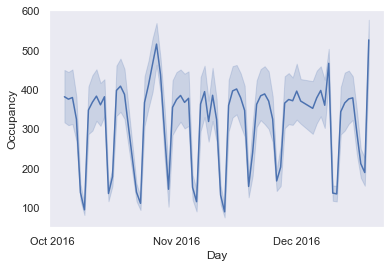

In [89]:
sns.lineplot(x='Day', y='Occupancy', data=park)
plt.xticks(months)


#the light blue part is the 95% confidence interval which comes with seaborn lineplot through bootstrapping

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

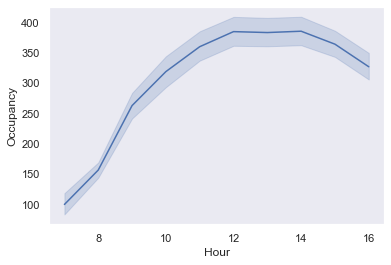

In [90]:
sns.lineplot(park.Hour, park.Occupancy)

Bootstrapping:
 - The observations which are to be plotted are sampled with uniform distribution. There are about 1000 bootstrap datasets
 - Now all the time periods which we were considering earlier in the graph are replaced with their occupancy values
 - Mean is calculated and all the values are sorted
 - Interval which contains 95% of the data is selcted and it marks as the confidence interval

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

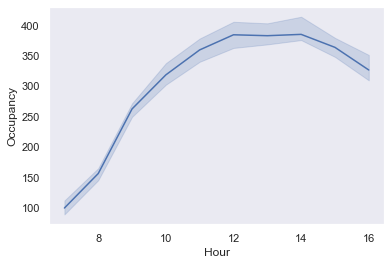

In [91]:
#we can change the samples of the bootstrap dataset
sns.lineplot(x='Hour', y='Occupancy', data=park, n_boot=10)

#the CI declines

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

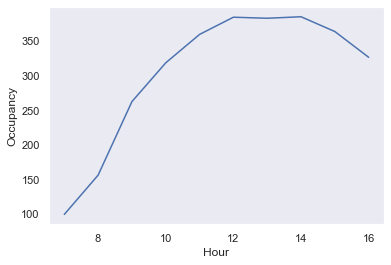

In [92]:
#we can even skip the CI
sns.lineplot(x='Hour', y='Occupancy', data=park, ci=None)

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

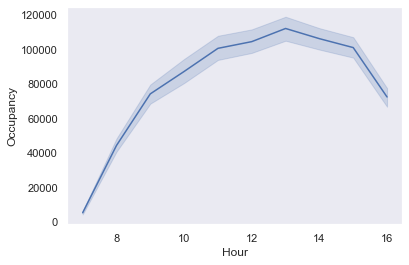

In [93]:
#instead of looking at the mean we can compare any value of central dendency or deviation etc.
sns.lineplot(x='Hour', y='Occupancy', data=park, estimator='sum')

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

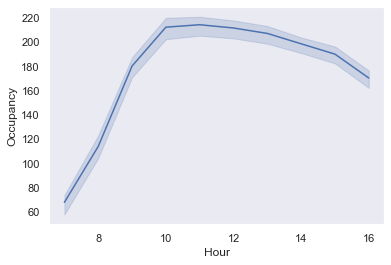

In [94]:
sns.lineplot(x='Hour', y='Occupancy', data=park, estimator='std')

<AxesSubplot:xlabel='Day', ylabel='Occupancy'>

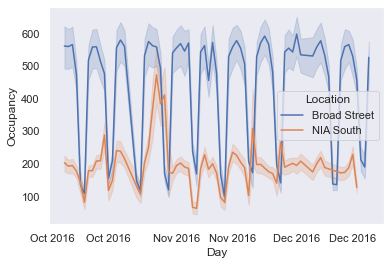

In [95]:
#we can pass additional categorical variables like we did before
sns.lineplot(x='Day', y='Occupancy', data=park, hue='Location')

## Regression Plot (Regplot)

In [96]:
diamonds= sns.load_dataset('diamonds')

In [97]:
diamonds.shape

(53940, 10)

In [98]:
diamonds=diamonds.sample(n=200, random_state=44)
diamonds.shape


(200, 10)

In [99]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
40423   0.70     Good     F      I1   63.8   60.0   1134  5.64  5.45  3.54
16309   1.11  Premium     H     VS2   61.1   59.0   6527  6.66  6.63  4.06
3260    0.93     Fair     G     SI1   64.4   57.0   3358  6.14  6.09  3.94
36811   0.30  Premium     G      IF   62.9   58.0    956  4.25  4.21  2.66
48721   0.52    Ideal     G    VVS2   60.8   57.0   2012  5.21  5.16  3.15

<AxesSubplot:xlabel='carat', ylabel='price'>

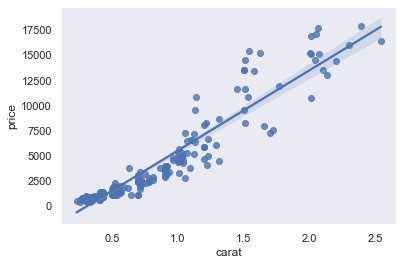

In [100]:
sns.regplot(x='carat', y='price', data=diamonds)

<AxesSubplot:xlabel='carat', ylabel='price'>

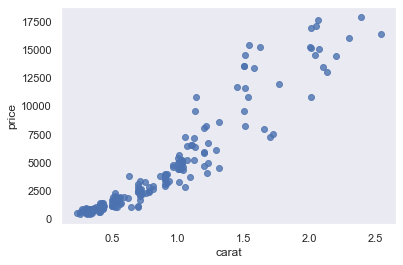

In [101]:
#the plot has the scatter as well as the line and we can choose any one of them too
sns.regplot(x='carat', y='price', data=diamonds, fit_reg=False)

<AxesSubplot:xlabel='carat', ylabel='price'>

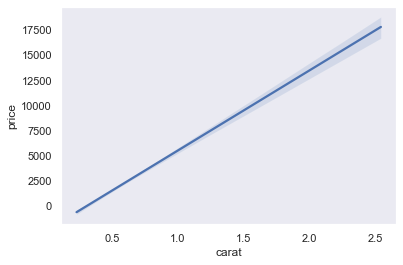

In [102]:
sns.regplot(x='carat', y='price', data=diamonds, scatter=False)

## Heatmap

In [103]:
import numpy as np
cars.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [104]:
origin_cyl= (cars.groupby('origin').cylinders.value_counts().unstack().fillna(0))
origin_cyl

cylinders     4     6      8
origin                      
europe     63.0   4.0    0.0
japan      69.0   6.0    0.0
usa        72.0  74.0  103.0

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

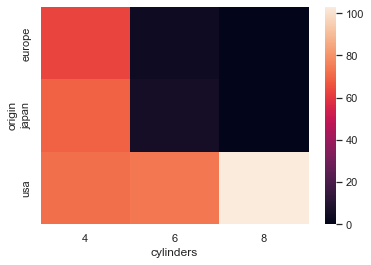

In [105]:
sns.heatmap(origin_cyl)

In [106]:
test_array= np.array([[1,2], [3,4]])
test_array

array([[1, 2],
       [3, 4]])

<AxesSubplot:>

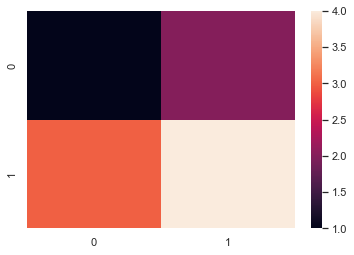

In [107]:
sns.heatmap(test_array)

In [108]:
origin_cyl.T #transpose of our original df

origin     europe  japan    usa
cylinders                      
4            63.0   69.0   72.0
6             4.0    6.0   74.0
8             0.0    0.0  103.0

<AxesSubplot:xlabel='origin', ylabel='cylinders'>

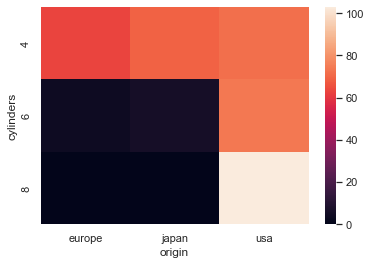

In [109]:
sns.heatmap(origin_cyl.T)

In [110]:
#in pd finding we can find correlation of every variable with each other. Pearson by default
cars.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.792406     -0.816812   -0.780259 -0.842035   
cylinders    -0.792406   1.000000      0.950611    0.851037  0.899145   
displacement -0.816812   0.950611      1.000000    0.902830  0.935108   
horsepower   -0.780259   0.851037      0.902830    1.000000  0.868906   
weight       -0.842035   0.899145      0.935108    0.868906  1.000000   
acceleration  0.416320  -0.526514     -0.560377   -0.692051 -0.431552   
model_year    0.578522  -0.355237     -0.374331   -0.416865 -0.312797   

              acceleration  model_year  
mpg               0.416320    0.578522  
cylinders        -0.526514   -0.355237  
displacement     -0.560377   -0.374331  
horsepower       -0.692051   -0.416865  
weight           -0.431552   -0.312797  
acceleration      1.000000    0.285078  
model_year        0.285078    1.000000

<AxesSubplot:>

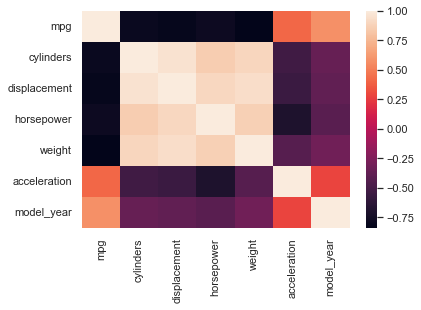

In [111]:
sns.heatmap(cars.corr())

Seaborn offers 170 different color palette options. Check out this [post](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f) to view them all.


<AxesSubplot:xlabel='cylinders', ylabel='origin'>

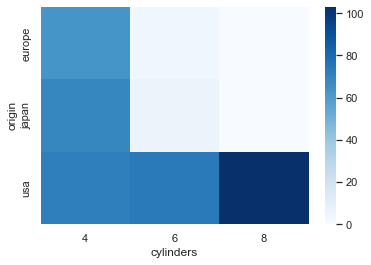

In [112]:
#Sequential Palette(one color palette)
sns.heatmap(origin_cyl, cmap='Blues')

<AxesSubplot:>

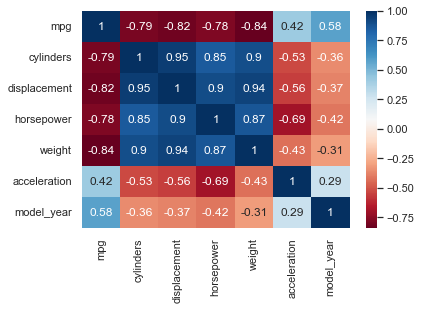

In [113]:
#Differential palette
sns.heatmap(cars.corr(), cmap='RdBu', annot=True)

#for easy understanding we can annotate the values on the heatmap
#if we want all the data in integers and not decimals we can use fmt='.0f', like format strings

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

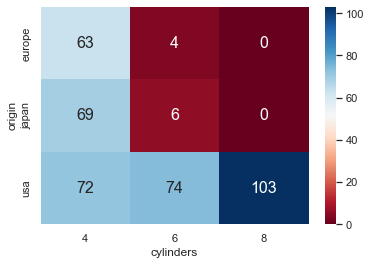

In [114]:
#all the annot can be customised using a dictionary called annot keywords
sns.heatmap(origin_cyl, annot=True, cmap='RdBu',fmt='.0f', annot_kws= {'fontsize': 16})

#fontweight=for font thinkness, fontfamily= writing style eg. serif

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

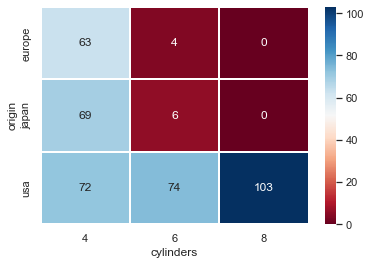

In [115]:
#just like any other graph we can add linewidth, linestyle, linecolor etc
sns.heatmap(origin_cyl, annot=True, cmap='RdBu',fmt='.0f', linewidth=2)


<AxesSubplot:>

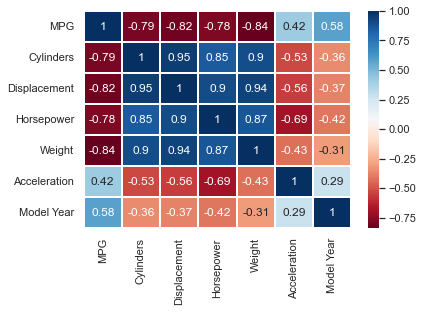

In [116]:
#we can add our own ticks and even switch them off by adding booleans
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year'
         ]


sns.heatmap(cars.corr(), annot=True, cmap='RdBu', linewidth=2, xticklabels=labels, yticklabels=labels)

## Joint Plot

There are basically three plots which are joint together for a better data understanding. The axes bar plots
and the scattered in the middle

In [117]:
gyser= sns.load_dataset('geyser')

In [118]:
gyser.head()

duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long

In [119]:
gyser.shape

(272, 3)

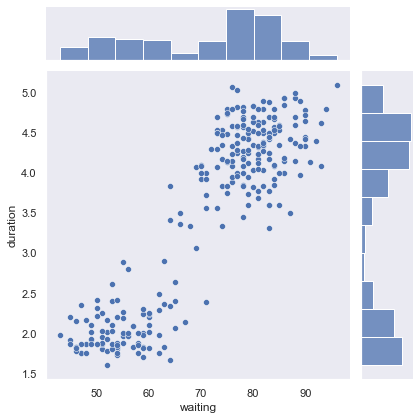

In [120]:
sns.jointplot(x='waiting', y='duration', data=gyser)

There are 6 different types of plots which can be plotted as a joint plot:
 - kde
 - reg
 - hist
 - hex
 - resid
 - scatter(default)

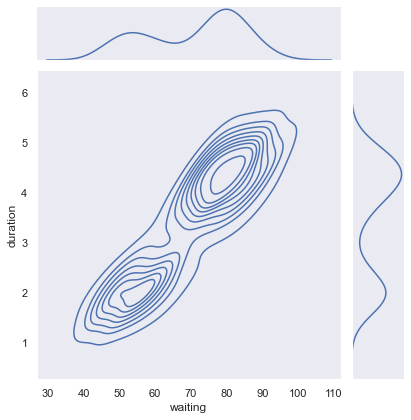

In [121]:
sns.jointplot(x='waiting', y='duration', data=gyser, kind='kde')

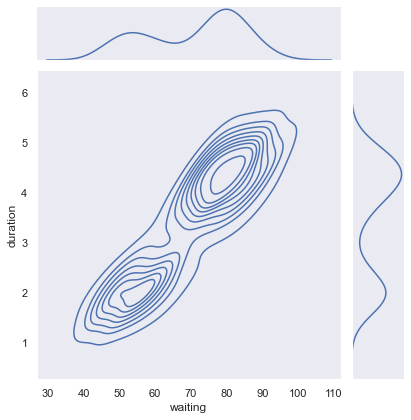

In [122]:
#These joinplots returns an object
g=sns.jointplot(x='waiting', y='duration', data=gyser, kind='kde')


In [123]:
type(g)
#we can clearly see that it returns a joint grid therefore we can use this g and add more plots over it

seaborn.axisgrid.JointGrid

In [124]:
g.plot_joint(sns.kdeplot, color='#444444', levels=5)


For the categorical data like we've always done, we can add it to the hue value of any other suitable parameter

## Cluster Map

In [125]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

In [128]:
toy= pd.DataFrame(toy_data_dict)
toy.set_index('Name', inplace=True)
toy

Hours_Studied  Score  Street_Address
Name                                        
Andy               10     15              11
Ben                20     20              24
Claire             12     16              18
David              28     25               9

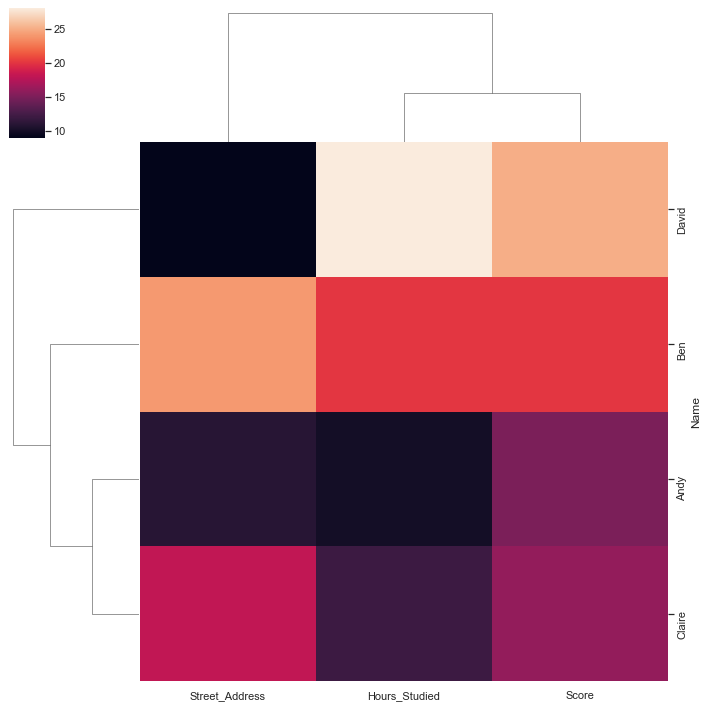

In [129]:
sns.clustermap(toy)

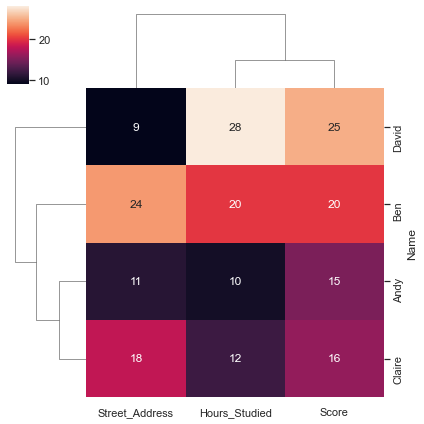

In [132]:
#We can reduce the size of the graph when it is way too large
sns.clustermap(toy, figsize=(6,6), annot=True)

#The lines are called dendrograms and that's how seaborn has clustered the data, according to the least distance

To make the cluster arrangement, seaborn is using an algorithm called **Hirarchichal Agglomerative Clustering (HAC)** 
 - Firstly all the datapoints are assigned there own clusters. eg: Imagine 5 data points on a x-y plane, each of them will be considered as a cluster.
 - Now the clusters close to each other will be grouped and this step is repeated until all the clusters are merged in together to form one big cluster.
 - The order of merging forms the dendrogram

In [136]:
penguins=sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [137]:
penguins.dropna()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

**Build Clustermap**

In [172]:
numerical_cols= penguins.columns[2:6]
nc= pd.DataFrame(penguins[numerical_cols]).dropna()
nc



bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[342 rows x 4 columns]

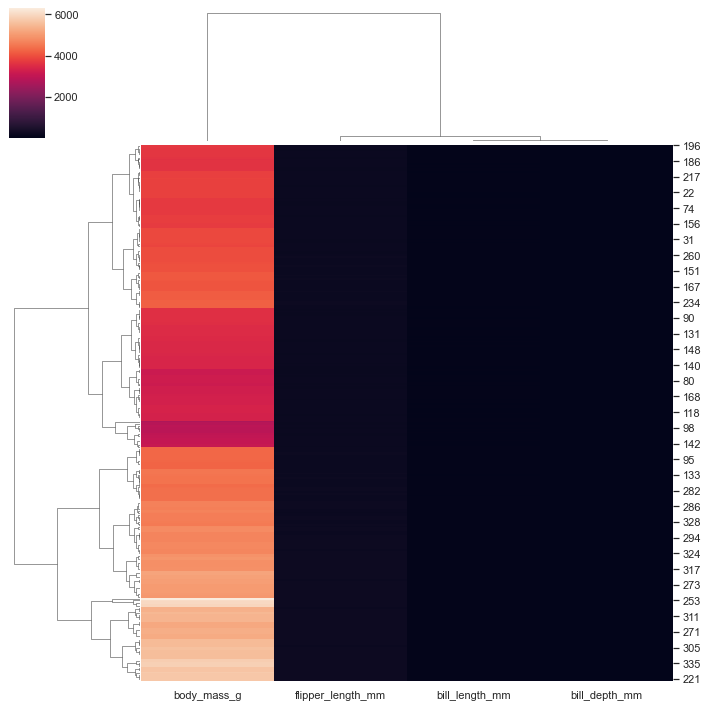

In [173]:
sns.clustermap(nc)

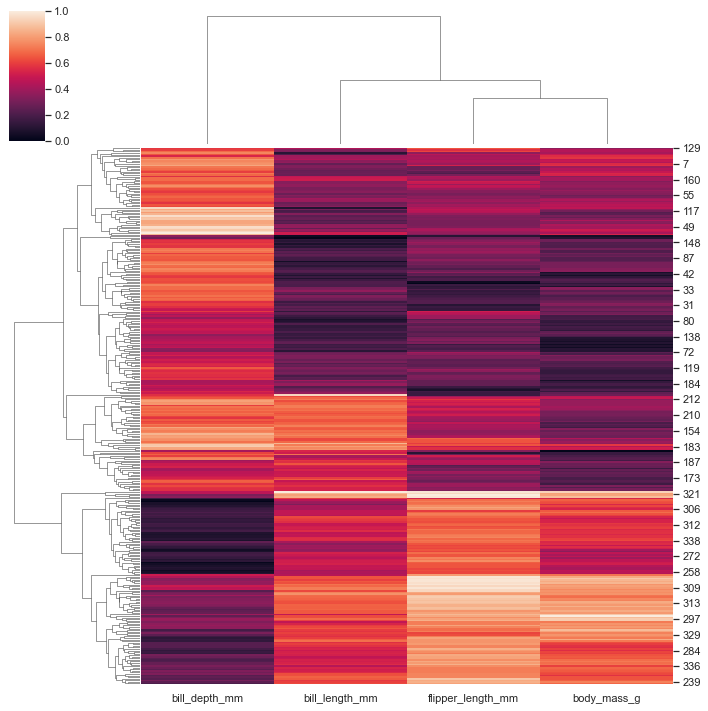

In [174]:
#as the variation of other data is more as compared to mass we can scale the graph for better understanding

sns.clustermap(nc, standard_scale=1)

### Linkage & Metric

They are two important properties that determine the cluster that HAC defines.
 - Metric to judge the distance btw two clusters. the default is the Euclidean(normal spatial) distance. (It can be manhatten distance or cosine distance depending upon the user)
 - Linkage is to judge the cluster formation:
   - A single linkage- Compares closest cluster points(the minimum linkage)
   - A complete linkage- Compares the farthest cluster points
   
Both linkage and metric can be modulated in the graph for a better understanding

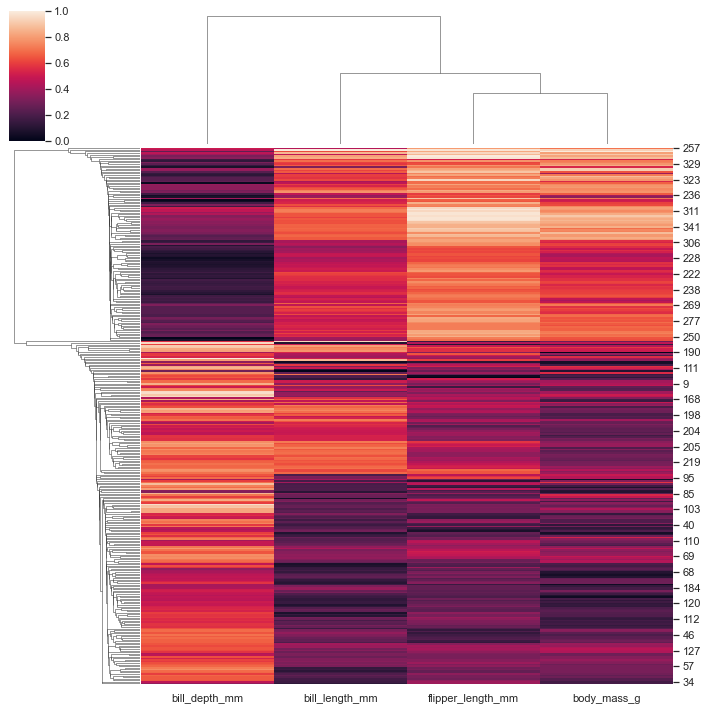

In [175]:
sns.clustermap(nc, standard_scale=1, method='single') #the default is avg linkage

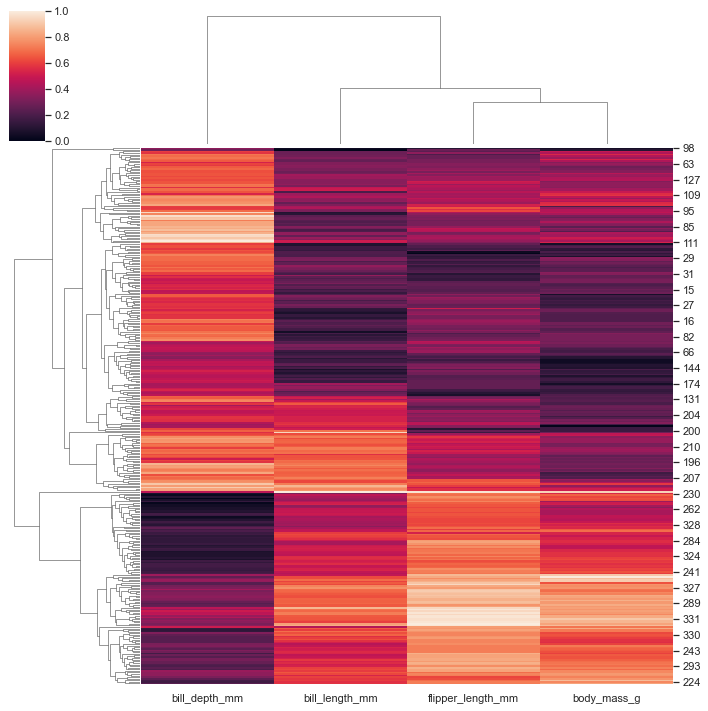

In [176]:
sns.clustermap(nc, standard_scale=1, metric='cityblock') #default euclidean
#cityblock uses manhatten distance

In [177]:
species_colors=penguins.species.map({
    'Adelie': 'blue',
    'Chinstrap': 'red',
    'Gentoo': 'green'
})

In [178]:
len(species_colors)

344

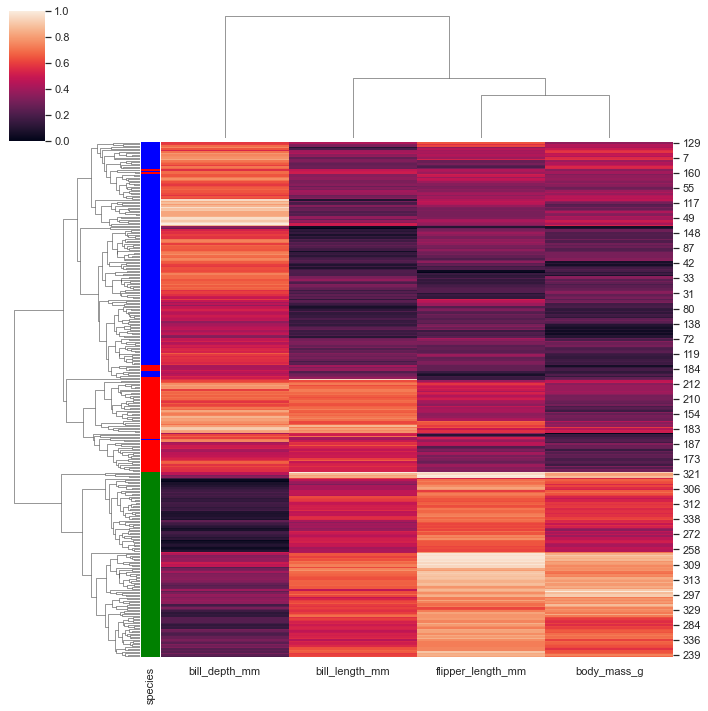

In [181]:
sns.clustermap(nc, standard_scale=1, row_colors= species_colors) #this kinda creates flag for species for easy reading

#this will help us to see that if a certain categorical dataset is important for the clustering or not